In [1]:
import zipfile
# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-09-29 10:20:11--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.201.128, 74.125.202.128, 74.125.69.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.201.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   206MB/s    in 0.5s    

2022-09-29 10:20:12 (206 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [2]:
import os
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print("There are {} directories and {} images in {}".format(len(dirnames),len(filenames),(dirpath)))

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/steak
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/steak
There are 0 directories and 750 images in pizza_steak/train/pizza


In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir+target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
  print(f"Image shape: {img.shape}")
  return img

Image shape: (512, 512, 3)


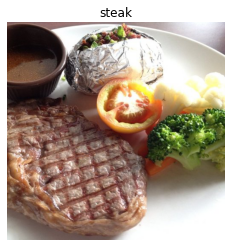

In [4]:
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

Image shape: (512, 512, 3)


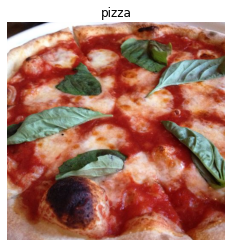

In [5]:
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten
from tensorflow.keras.models import Sequential

In [7]:
train_datagen=ImageDataGenerator(rescale=1./255,rotation_range=15,shear_range=0.15,  zoom_range=0.15, horizontal_flip=True,vertical_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255,rotation_range=15,shear_range=0.15,  zoom_range=0.15, horizontal_flip=True,vertical_flip=True)

train_data=train_datagen.flow_from_directory("pizza_steak/train", target_size=(224,224), class_mode='binary',shuffle=True)
test_data=test_datagen.flow_from_directory("pizza_steak/test", target_size=(224,224), class_mode='binary',shuffle=True)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [8]:
model=Sequential()
model.add(Conv2D(filters=32, kernel_size=2, strides=1, padding='valid',input_shape=(224,224,3),activation='relu'))
model.add(MaxPool2D(pool_size=3))
model.add(Conv2D(filters=32, kernel_size=2, strides=1, padding='valid',activation='relu'))
model.add(MaxPool2D(pool_size=3))
model.add(Conv2D(filters=32, kernel_size=2, strides=1, padding='valid',activation='relu'))
model.add(MaxPool2D(pool_size=3))
model.add(Flatten())
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
history1=model.fit(train_data,epochs=15,validation_data=test_data,steps_per_epoch=len(train_data),validation_steps=len(test_data))

Epoch 1/15
47/47 [==============================] - 33s 621ms/step - loss: 0.6249 - accuracy: 0.6280 - val_loss: 0.5319 - val_accuracy: 0.6880
Epoch 2/15
47/47 [==============================] - 25s 524ms/step - loss: 0.4802 - accuracy: 0.7800 - val_loss: 0.4063 - val_accuracy: 0.8060
Epoch 3/15
47/47 [==============================] - 25s 538ms/step - loss: 0.4266 - accuracy: 0.8073 - val_loss: 0.3549 - val_accuracy: 0.8560
Epoch 4/15
47/47 [==============================] - 24s 522ms/step - loss: 0.3899 - accuracy: 0.8347 - val_loss: 0.3691 - val_accuracy: 0.8360
Epoch 5/15
47/47 [==============================] - 25s 539ms/step - loss: 0.3848 - accuracy: 0.8293 - val_loss: 0.2811 - val_accuracy: 0.8780
Epoch 6/15
47/47 [==============================] - 25s 525ms/step - loss: 0.3581 - accuracy: 0.8420 - val_loss: 0.2700 - val_accuracy: 0.8900
Epoch 7/15
47/47 [==============================] - 24s 520ms/step - loss: 0.3448 - accuracy: 0.8613 - val_loss: 0.3083 - val_accuracy: 0.8760

In [9]:
import pandas as pd

In [10]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

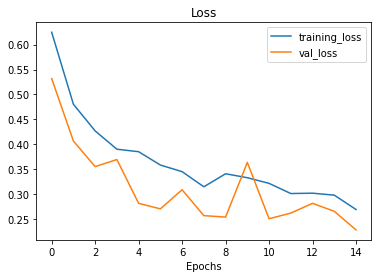

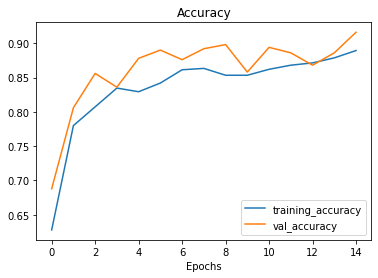

In [11]:
plot_loss_curves(history1)

In [12]:
model.save("saved Pizza_steak model")